# Data Mining the Healthcare Dataset

### Import useful Libraries 

In [1]:
# For Complete Analysis, import the following useful libraries
import pandas as pd
import numpy as np
import math

# For Visualization, import the following libraries
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For Data Preprocessing
# Import libraries for handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Import libraries for encoding
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Import library for balancing
from imblearn.over_sampling import SMOTE

# Import library for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# For Supervised Models
# Import the following libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# For Unsupervised Models
# Import the following libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import skfuzzy as fuzz
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


### Load the dataset and display the first few rows  to understand its structure.

In [2]:
patient_train_df = pd.read_csv("C:/Users/HP/Documents/CW2/disease_train.csv")
patient_train_df.head()

,id,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,...,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect,target
0,PA1001,59,male,no,no,7.8,NaN,89.0,0.85,105.0,...,no,no,no,no,no,no,no,no,no,moderate_risk
1,PA1002,48,female,no,no,1.5,2.5,101.0,0.97,104.0,...,no,no,yes,no,no,yes,no,no,no,low_risk
2,PA1003,77,male,no,no,7.3,1.2,57.0,1.28,44.0,...,no,no,no,no,no,no,no,no,no,moderate_risk
3,PA1004,42,female,no,no,1.2,2.5,106.0,0.98,108.0,...,no,no,no,no,no,no,no,no,no,low_risk
4,PA1005,38,female,no,no,0.6,1.9,95.0,NaN,NaN,...,no,no,no,no,no,no,no,no,no,low_risk


### Data Exploration, Visualisations, and Summary:

In [3]:
#Learn about the dataset's datatypes, total rows and columns, and whether or not null values are available.
patient_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4250 non-null   object 
 1   age              4250 non-null   int64  
 2   gender           4109 non-null   object 
 3   sick             4250 non-null   object 
 4   pregnant         4250 non-null   object 
 5   test_X1          3839 non-null   float64
 6   test_X2          3007 non-null   float64
 7   test_X3          4034 non-null   float64
 8   test_X4          3858 non-null   float64
 9   test_X5          3863 non-null   float64
 10  test_X6          154 non-null    float64
 11  concern_type1    4250 non-null   object 
 12  concern_type2    4250 non-null   object 
 13  enlargement      4250 non-null   object 
 14  tumor            4250 non-null   object 
 15  disorder         4250 non-null   object 
 16  medication_A     4250 non-null   object 
 17  medication_B  

In [4]:
# Summary statistics for numerical columns from the dataset
patient_train_df.describe()

,age,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6
count,4250.000000,3839.000000,3007.000000,4034.000000,3858.000000,3863.000000,154.000000
mean,67.374824,7.342463,2.035580,104.919623,0.970846,110.090834,23.325974
std,1004.518821,32.657963,0.920404,35.496255,0.162474,39.837621,5.317032
min,1.000000,0.005000,0.050000,2.000000,0.250000,1.400000,8.400000
25%,37.000000,0.600000,1.600000,87.000000,0.870000,92.000000,20.000000
50%,55.000000,1.500000,1.900000,102.000000,0.960000,107.000000,24.000000
75%,67.000000,3.000000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,1.960000,642.000000,45.000000


In [5]:
# Summary statistics for categorical columns from the dataset
patient_train_df.describe(include='object')

,id,gender,sick,pregnant,concern_type1,concern_type2,enlargement,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect,target
count,4250,4109,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250,4250
unique,4250,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,3
top,PA1001,female,no,no,no,no,no,no,no,no,no,no,no,no,no,no,low_risk
freq,1,2787,4095,4235,4183,3905,4215,4139,4250,3760,4196,4056,4205,4188,4169,3951,3612


In [6]:
# Check missing values from the dataset
missing_data = patient_train_df.isnull().sum()
print("Summary of Missing values (Descending order):")
print("Column_Name"," "*7,"Missing Value")
for column, count in missing_data.sort_values(ascending=False).items():
    print(f"{column.ljust(20)} {count}")

Summary of Missing values (Descending order):
Column_Name         Missing Value
test_X6              4096
test_X2              1243
test_X1              411
test_X4              392
test_X5              387
test_X3              216
gender               141
id                   0
medication_A         0
suspect              0
treatment_type1      0
surgery              0
mood_stabiliser      0
mental_health        0
medication_B         0
concern_type2        0
disorder             0
tumor                0
enlargement          0
age                  0
concern_type1        0
pregnant             0
sick                 0
target               0


#From the above table 1.Gender: There are 141 missing values out of 4250 observations. 2.Test_X1 to Test_X6: These columns also have missing values. Among them, Test_X6 has the highest number of missing values, with 4096 out of 4250 observations being missing. 3.Rest of columns have no missing values.

Handling missing values in these columns is crucial for ensuring the integrity of the dataset and the accuracy of any subsequent analyses or models. Depending on the context, strategies such as imputation or deletion may be applied to address these missing values

In [7]:
# Drop id column for further anaysis
patient_train_df.drop('id',axis=1,inplace=True)
patient_train_df.head()

,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6,...,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect,target
0,59,male,no,no,7.8,NaN,89.0,0.85,105.0,NaN,...,no,no,no,no,no,no,no,no,no,moderate_risk
1,48,female,no,no,1.5,2.5,101.0,0.97,104.0,NaN,...,no,no,yes,no,no,yes,no,no,no,low_risk
2,77,male,no,no,7.3,1.2,57.0,1.28,44.0,NaN,...,no,no,no,no,no,no,no,no,no,moderate_risk
3,42,female,no,no,1.2,2.5,106.0,0.98,108.0,27.0,...,no,no,no,no,no,no,no,no,no,low_risk
4,38,female,no,no,0.6,1.9,95.0,NaN,NaN,NaN,...,no,no,no,no,no,no,no,no,no,low_risk


### Visualizations for Numerical Columns in the preliminary investigation

#### Histograms for numerical columns:

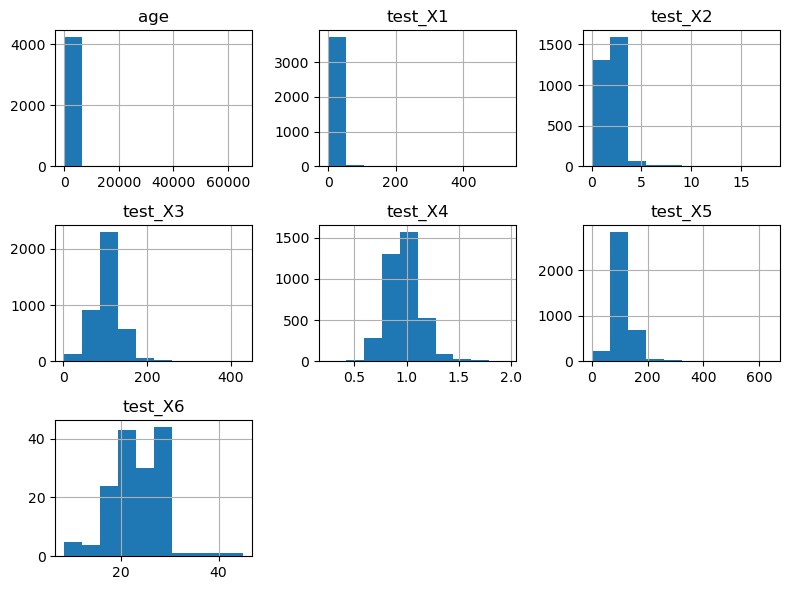

In [8]:
patient_train_df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()


In [9]:
# Seperate Numerical columns from Dataset for further anaysis 
numerical_columns = patient_train_df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns

['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'test_X6']

#### Box plots for numerical Columns

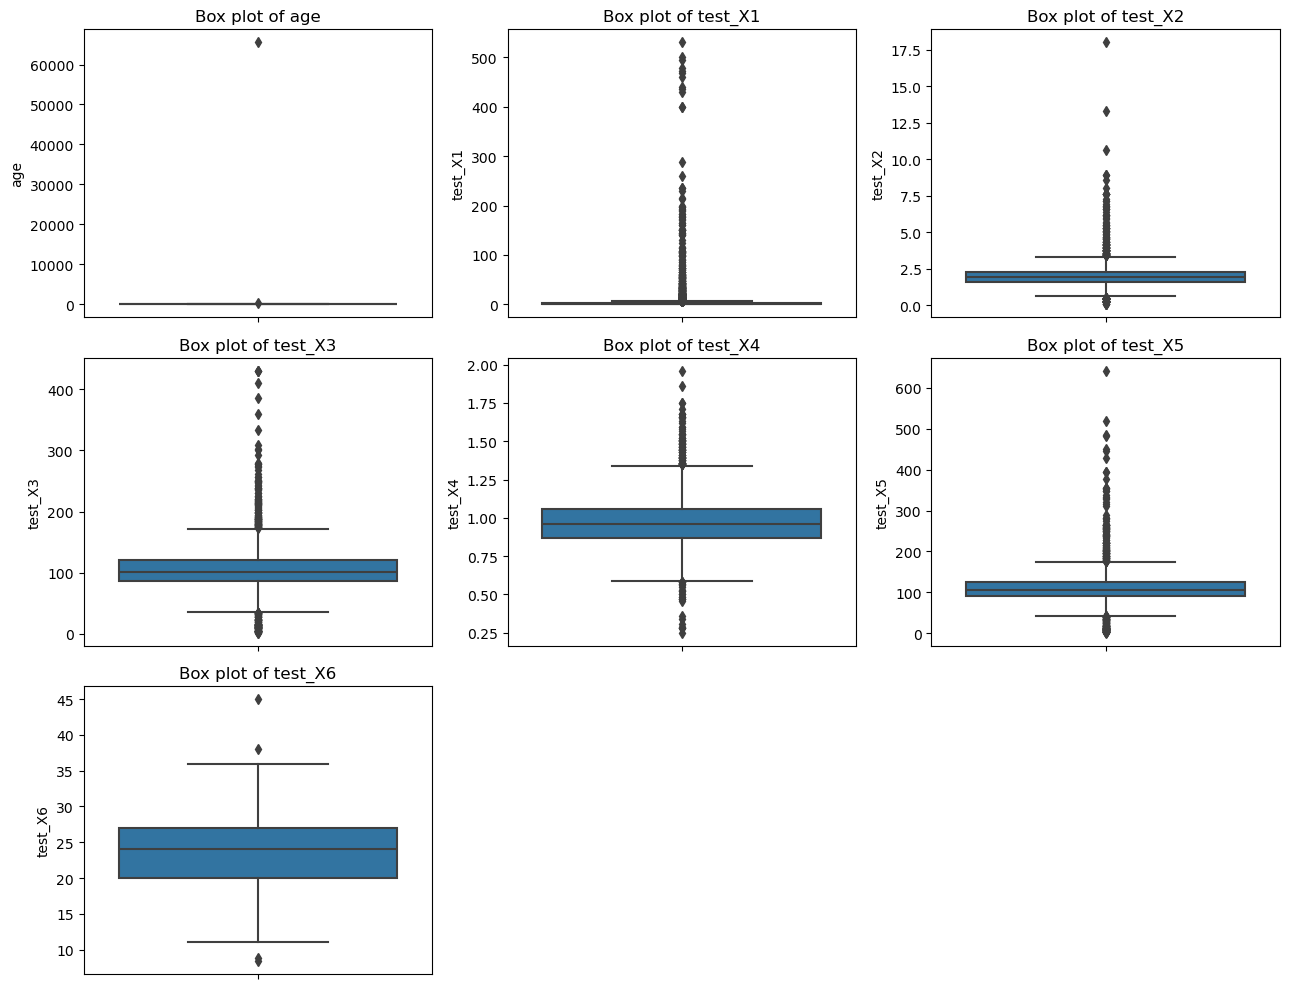

In [10]:
# Create a new figure and axis object
plt.figure(figsize=(13, 10)) 
# for creating subplots
number_of_plots = len(numerical_columns)
number_of_columns = 3  
number_of_rows = (number_of_plots // number_of_columns) + (number_of_plots % number_of_columns)  # Calculate number of rows needed

#To generate a box plot in a subplot, iterate over each numerical feature.
for i, feature in enumerate(numerical_columns, start=1):
    plt.subplot(number_of_rows, number_of_columns, i)
    sns.boxplot(y=patient_train_df[feature])
    plt.title(f'Box plot of {feature}')

#To prevent overlap,adjust the layout
plt.tight_layout()
plt.show()


### Correlation matrix at Initial Visualization stage

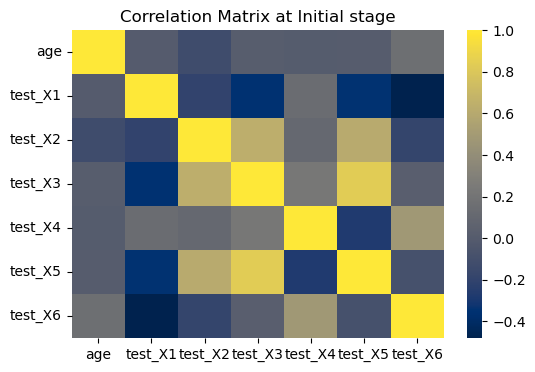

In [11]:
corr_matrix = patient_train_df[numerical_columns].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,cmap='cividis',fmt=".2f")
plt.title('Correlation Matrix at Initial stage')
plt.show()

### Visualizations for Categorical Columns in the preliminary investigation

In [12]:
# Seperate Categorical columns from dataset for further anaysis
categorical_columns = patient_train_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'disorder',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect',
 'target']

#### Visualization through Count plots for categorical columns

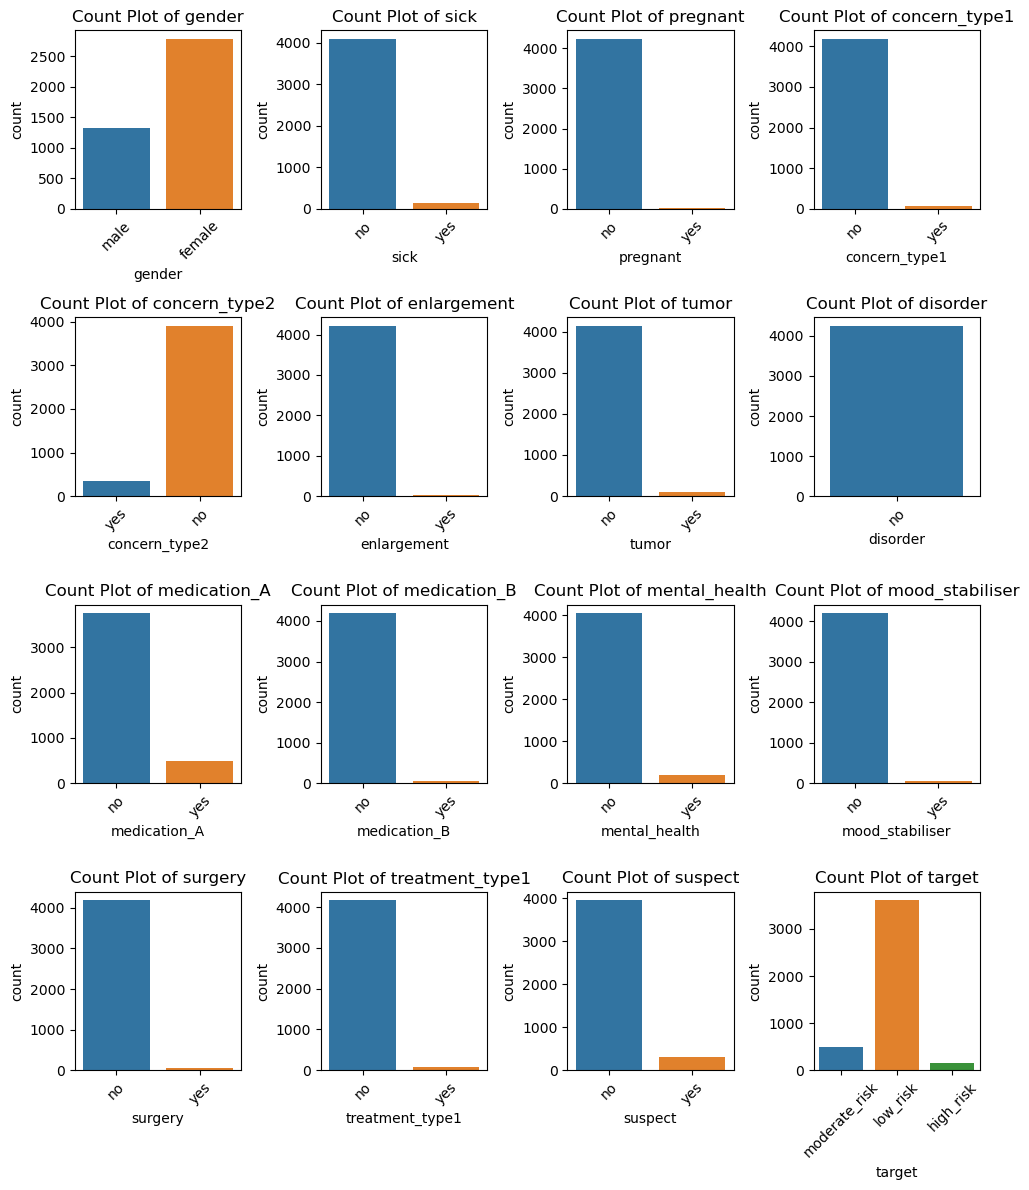

In [13]:
# Determine the number of rows and columns for subplots
number_columns = 4  
number_rows = math.ceil(len(categorical_columns) / number_columns)  

# Create subplots for count plots
plt.figure(figsize=(10, 3 * number_rows))  
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(number_rows, number_columns, i)
    sns.countplot(x=column, data=patient_train_df)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Data Cleansing and Pre-processing

### Handle missing values in Dataset

In [14]:
# calculate percentage of missing values and suggest whose percentages > threshold vlaue

threshold = 60  # Set threshold here

missing_percentage = ((patient_train_df.isnull().sum() / len(patient_train_df)) * 100).sort_values(ascending=False)
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

print("Columns with missing values > {}%:".format(threshold))
for column in columns_to_drop:
    print("{}: {:.2f}% missing values.".format(column, missing_percentage[column]))


Columns with missing values > 60%:
test_X6: 96.38% missing values.


In [15]:
# Drop coulmns whose missing percentages > threshold values.
patient_train_df.drop(columns=columns_to_drop, inplace=True)

In [16]:
# Verify columns after droping missing value columns based on threshold value percentages
patient_train_df.columns

Index(['age', 'gender', 'sick', 'pregnant', 'test_X1', 'test_X2', 'test_X3',
       'test_X4', 'test_X5', 'concern_type1', 'concern_type2', 'enlargement',
       'tumor', 'disorder', 'medication_A', 'medication_B', 'mental_health',
       'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect', 'target'],
      dtype='object')

In [17]:
# After Droping highest missing value column based on threshold value,handle remaining missing values.
updated_numerical_col = patient_train_df.select_dtypes(include=['int64','float64']).columns.tolist()
updated_numerical_col    


['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']

In [18]:
# For Numerical columns: Impute missing values with median
numeric_imputer = SimpleImputer(strategy="median")
patient_train_df[updated_numerical_col] = numeric_imputer.fit_transform(patient_train_df[updated_numerical_col])

# For Categorical column 'gender': Impute missing values with mode
categorical_imputer = SimpleImputer(strategy="most_frequent")
patient_train_df['gender'] = categorical_imputer.fit_transform(patient_train_df[['gender']]).ravel()

# Check if there are any remaining missing values
remaining_missing_values = patient_train_df.isnull().sum().sum()
if remaining_missing_values == 0:
    print("All missing values have been handled.")
else:
    print(f"There are still {remaining_missing_values} missing values after imputation.")


All missing values have been handled.


### Handle outliers in Dataset

In [19]:
# Handle outliers in numerical columns using IQR
Q1 = patient_train_df[updated_numerical_col].quantile(0.25)
Q3 = patient_train_df[updated_numerical_col].quantile(0.75)
IQR = Q3 - Q1
def winsorize(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    column_values = patient_train_df[column].copy()
    column_values[column_values < lower_bound] = lower_bound
    column_values[column_values > upper_bound] = upper_bound
    return column_values

# Apply winsorization transformation to all numerical columns
for column in updated_numerical_col:
    patient_train_df[column] = winsorize(column)


### Handle Constant in Dataset

In [20]:
#find constant column if any in dataset
constant_columns = []
for col in patient_train_df.columns:
    if patient_train_df[col].nunique() == 1:
        constant_columns.append(col)

# Print constant columns
print("Constant columns:", constant_columns)

Constant columns: ['disorder']


In [21]:
# Drop Constant column from column list
patient_train_df.drop(columns=constant_columns, inplace=True)

In [22]:
# check remaining columns in dataframe after droping 'disorder' colum from dataset
patient_train_df.columns
patient_train_df.shape

(4250, 21)

### Handle Duplicates in Dataset

In [23]:
# handle Duplicated Rows in dataset if any
duplicate_rows = patient_train_df[patient_train_df.duplicated()]
duplicate_rows
# Drop Duplicate values from dataset
patient_train_df.drop_duplicates(inplace=True)
patient_train_df.shape

(4208, 21)

From the dataset of 4250 , 42 records found duplicate

In [24]:
# After handling Constant and remove target column, updated categorical col
update_categorical_col = patient_train_df.select_dtypes(include=['object']).columns.tolist()
update_categorical_col.remove('target')
update_categorical_col

['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect']

In [25]:
#Check the number of categories and the count of data available in each category for the 'target' column
patient_train_df['target'].value_counts()

target
low_risk         3570
moderate_risk     489
high_risk         149
Name: count, dtype: int64

### Encoding  the Categorical columns  of the Dataset

In [26]:
# Encoding on update_categorical_col for further analysis
patient_train_df_encoded = pd.get_dummies(patient_train_df, columns=update_categorical_col, drop_first=True)

In [27]:
# label encoder for target column because it has three categories like low risk, modarate risk and high risk

le = LabelEncoder()
patient_train_df_encoded['target'] = le.fit_transform(patient_train_df_encoded['target'])

In [28]:
# Check dataset after encoding 
patient_train_df_encoded = patient_train_df_encoded.astype(int)
patient_train_df_encoded.head()

,age,test_X1,test_X2,test_X3,test_X4,test_X5,target,gender_male,sick_yes,pregnant_yes,...,concern_type2_yes,enlargement_yes,tumor_yes,medication_A_yes,medication_B_yes,mental_health_yes,mood_stabiliser_yes,surgery_yes,treatment_type1_yes,suspect_yes
0,59,5,1,89,0,105,2,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,48,1,2,101,0,104,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,77,5,1,57,1,50,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42,1,2,106,0,108,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,0,1,95,0,107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# From the above count plot for categorical columns, we identify that 'target' column has imbalnce data.
# visualize encoding of 'target' column after encoding.
patient_train_df_encoded['target'].value_counts()

target
1    3570
2     489
0     149
Name: count, dtype: int64

### Define Variable X and y for further anaysis.

In [30]:
X = patient_train_df_encoded.drop(columns=['target'])  # Features
y = patient_train_df_encoded['target']  # Target variable

### Balance data for Training Model

In [31]:
#To balance the dataset,apply SMOTE.
smote = SMOTE(random_state=42)
X_rsmpd, y_rsmpd = smote.fit_resample(X, y) 

### Feature selection for further analysis

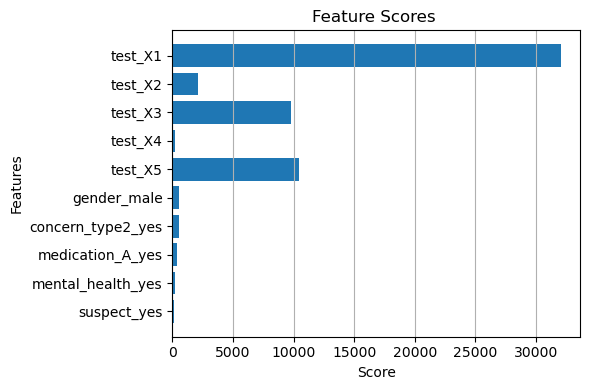

In [32]:
# Perform feature selection using SelectKBest
f_s = SelectKBest(score_func=f_classif, k=10)  # change k as per need
X_selected = f_s.fit_transform(X_rsmpd, y_rsmpd) # if want to check on imbalance data change X_rsmpd to X and y_smpd to y

# Get scores and p-values of features
f_scores = f_s.scores_
f_p_values = f_s.pvalues_

# Get the names of selected features
sel_fea_names = X_rsmpd.columns[f_s.get_support()]

# Reverse the order of features and scores
sel_fea_names = sel_fea_names[::-1]
f_scores = f_scores[f_s.get_support()][::-1]

# Plotting the scores of features
plt.figure(figsize=(6, 4))
plt.barh(sel_fea_names, f_scores)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Scores ')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Transform the original dataset using the selected features
X_selected_df = pd.DataFrame(X_selected, columns=sel_fea_names)


### Supervised Model Training, Tuning and Evalualte and On Best Model Create Confusion Matrix and Roc-Auc Curve and generate csv file for predicted lables

KNN Accuracy: 0.9321506380329909
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1091
           1       0.94      0.85      0.89      1084
           2       0.91      0.98      0.94      1038

    accuracy                           0.93      3213
   macro avg       0.93      0.93      0.93      3213
weighted avg       0.93      0.93      0.93      3213

SVM Accuracy: 0.9788359788359788
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1091
           1       0.98      0.95      0.97      1084
           2       0.98      1.00      0.99      1038

    accuracy                           0.98      3213
   macro avg       0.98      0.98      0.98      3213
weighted avg       0.98      0.98      0.98      3213

Decision Tree Accuracy: 0.969187675070028
Decision Tree Classification Report:
              precision    recall  f1-s

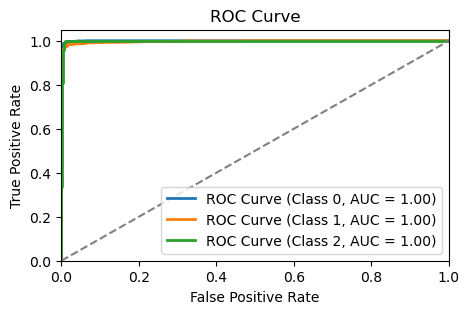

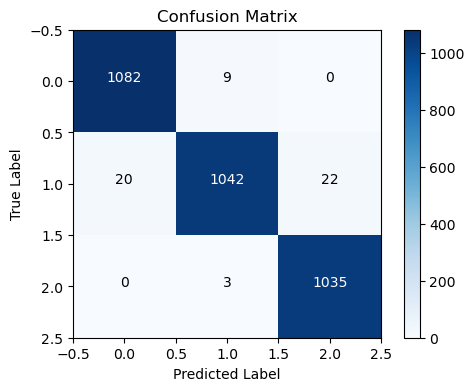

In [33]:
# Define models and their respective parameter grids for tuning
models = {
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "SVM": (SVC(), {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),
    "CatBoost": (CatBoostClassifier(verbose=False), {'iterations': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1]})
}

best_model_name = ""
best_accuracy = 0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rsmpd, y_rsmpd, test_size=0.3, random_state=42)

# Train and evaluate models
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = grid_search.best_estimator_

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_accuracy}")

# Generate  ROC curve and confusion matrix for the best model
y_pred_proba = best_model.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(best_model.classes_)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for the best model
plt.figure(figsize=(5, 3))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC Curve (Class {i}, AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Generate confusion matrix for the best model
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with values
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# Add value annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Predict target values for X_test using the best model
predicted_target = best_model.predict(X_test)

# Decode the predicted target labels
predicted_target_original = le.inverse_transform(predicted_target)

# Create a DataFrame with the decoded predicted target values
predicted_df = pd.DataFrame(predicted_target_original, columns=['Predicted_Target'])

# Concatenate X_test and predicted_df horizontally
#result_df = pd.concat([X_test.reset_index(drop=True), predicted_df], axis=1)

# Save the DataFrame to a CSV file
#result_df.to_csv('predictedTarget_with_X_test.csv', index=False)

# Save the DataFrame to a CSV file
predicted_df.to_csv('predictedTarget.csv', index=False)


### Unsupervised Learning using Clustering Algorithm

In [34]:
#Prior to doing unsupervised learning, make sure the dataset has undergone pretreatment by handling missing values and outliers.
#Manage duplicates, handle constants, and encode categorical variables
patient_train_df_encoded.head()

,age,test_X1,test_X2,test_X3,test_X4,test_X5,target,gender_male,sick_yes,pregnant_yes,...,concern_type2_yes,enlargement_yes,tumor_yes,medication_A_yes,medication_B_yes,mental_health_yes,mood_stabiliser_yes,surgery_yes,treatment_type1_yes,suspect_yes
0,59,5,1,89,0,105,2,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,48,1,2,101,0,104,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,77,5,1,57,1,50,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42,1,2,106,0,108,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,0,1,95,0,107,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# For Unsupervised learning using clustering exclude medical diagnosis ('target')
usc_patient_df = patient_train_df_encoded.drop(['target'], axis=1)
usc_patient_df.columns

Index(['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5',
       'gender_male', 'sick_yes', 'pregnant_yes', 'concern_type1_yes',
       'concern_type2_yes', 'enlargement_yes', 'tumor_yes', 'medication_A_yes',
       'medication_B_yes', 'mental_health_yes', 'mood_stabiliser_yes',
       'surgery_yes', 'treatment_type1_yes', 'suspect_yes'],
      dtype='object')

### Noramlize Data for further anaysis

In [36]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the data
scaled_data = scaler.fit_transform(usc_patient_df)

# Convert the standardized data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=usc_patient_df.columns)
print("scaled_df shape:",scaled_df.shape)
scaled_df.head()

scaled_df shape: (4208, 20)


,age,test_X1,test_X2,test_X3,test_X4,test_X5,gender_male,sick_yes,pregnant_yes,concern_type1_yes,concern_type2_yes,enlargement_yes,tumor_yes,medication_A_yes,medication_B_yes,mental_health_yes,mood_stabiliser_yes,surgery_yes,treatment_type1_yes,suspect_yes
0,0.374479,1.987737,-0.734259,-0.546479,-0.778922,-0.129863,1.481601,-0.195559,-0.059811,-0.127199,3.362156,-0.091582,-0.164599,-0.362611,-0.114015,-0.219843,-0.103969,-0.122287,-0.140096,-0.276569
1,-0.212414,-0.343315,1.361917,-0.106339,-0.778922,-0.169438,-0.674946,-0.195559,-0.059811,-0.127199,-0.297428,-0.091582,-0.164599,2.757774,-0.114015,-0.219843,9.618270,-0.122287,-0.140096,-0.276569
2,1.334850,1.987737,-0.734259,-1.720186,1.283825,-2.306530,1.481601,-0.195559,-0.059811,-0.127199,-0.297428,-0.091582,-0.164599,-0.362611,-0.114015,-0.219843,-0.103969,-0.122287,-0.140096,-0.276569
3,-0.532538,-0.343315,1.361917,0.077052,-0.778922,-0.011135,-0.674946,-0.195559,-0.059811,-0.127199,-0.297428,-0.091582,-0.164599,-0.362611,-0.114015,-0.219843,-0.103969,-0.122287,-0.140096,-0.276569
4,-0.745953,-0.926078,-0.734259,-0.326409,-0.778922,-0.050711,-0.674946,-0.195559,-0.059811,-0.127199,-0.297428,-0.091582,-0.164599,-0.362611,-0.114015,-0.219843,-0.103969,-0.122287,-0.140096,-0.276569


### Define K-value based on Elbow Method and Silhouette Score

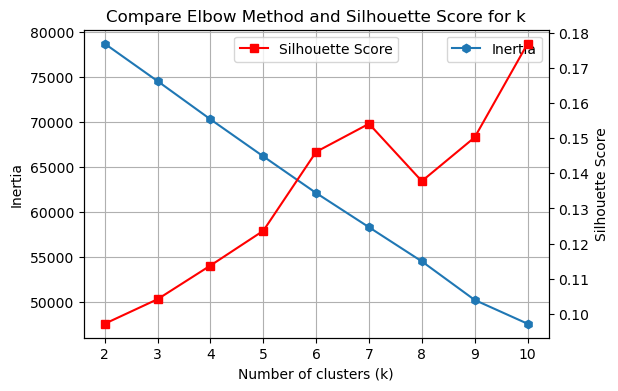

In [37]:
# Create initial lists to hold silhouette scores and inertia for various values of k.
inertia = []
silhouette_scores = []

# Experiment with several values of k and determine the silhouette score and inertia for each value.
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=7)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
    kmeans_labels = kmeans.predict(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans_labels))

# Plot both the elbow curve and silhouette scores on the same graph
plt.figure(figsize=(6, 4))

# Plot the elbow curve
plt.plot(range(2, 11), inertia, marker='h', label='Inertia')
plt.title('Compare Elbow Method and Silhouette Score for k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.legend(loc='upper right')

# Plot the silhouette scores
plt.twinx()
plt.plot(range(2, 11), silhouette_scores, marker='s', color='r', label='Silhouette Score')
plt.ylabel('Silhouette Score')
plt.legend(loc='upper center')

plt.show()


###  Perform K-means clustering 

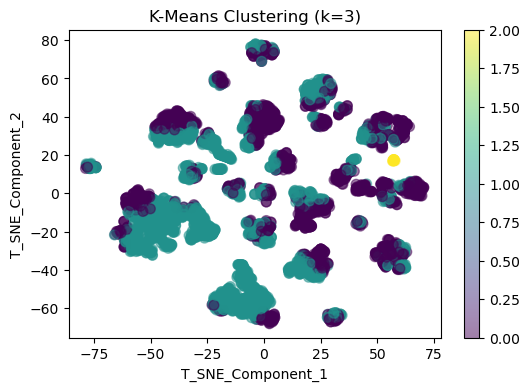

In [38]:
# Perform k-means clustering with k=3 based on silhoutte score and elbow graph
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)

scaled_df['kmeans_labels'] = kmeans.fit_predict(scaled_df)

# Apply dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_df.drop('kmeans_labels', axis=1))

# Plotting t-SNE results with k-Means cluster labels
plt.figure(figsize=(6, 4))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=scaled_df['kmeans_labels'], cmap='viridis',s=50, marker='o', alpha=0.5)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('T_SNE_Component_1')
plt.ylabel('T_SNE_Component_2')
plt.colorbar()
plt.show()



In [39]:
# Calculate the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Convert centroids into a dataframe for better readability
centroids_df = pd.DataFrame(scaler.inverse_transform(cluster_centroids), columns=scaled_df.columns[:-1])

centroids_df


,age,test_X1,test_X2,test_X3,test_X4,test_X5,gender_male,sick_yes,pregnant_yes,concern_type1_yes,concern_type2_yes,enlargement_yes,tumor_yes,medication_A_yes,medication_B_yes,mental_health_yes,mood_stabiliser_yes,surgery_yes,treatment_type1_yes,suspect_yes
0,51.538421,0.857292,1.539467,124.470988,0.490329,124.557240,0.243596,0.029273,3.122502e-17,0.018296,0.126503,0.009932,0.035546,0.210664,0.017773,0.067433,0.004182,0.016205,0.017773,0.073183
1,52.479386,2.210965,1.190351,86.526316,0.280263,94.654825,0.373246,0.043421,3.339343e-17,0.013596,0.040789,0.007018,0.017982,0.035965,0.008772,0.028509,0.016228,0.013596,0.020614,0.069737
2,32.733333,0.400000,1.533333,121.000000,0.800000,103.800000,0.000000,0.000000,1.000000e+00,0.066667,0.466667,0.000000,0.133333,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
# Count the number of instances in each cluster
cluster_counts = scaled_df['kmeans_labels'].value_counts().sort_index()

cluster_counts


kmeans_labels
0    1906
1    2287
2      15
Name: count, dtype: int64

### Hierarchical Clsutering

In [41]:
# Preparing the dataset (excluding the kmeans_labels column if it exists)
hierarchical_c_df = scaled_df.drop('kmeans_labels', axis=1, errors='ignore')


# Applying Hierarchical Clustering with 3 clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_c_df['hierarchical_labels'] = hierarchical_clustering.fit_predict(hierarchical_c_df)

# Count the number of instances in each cluster
hierarchical_cluster_counts = hierarchical_c_df['hierarchical_labels'].value_counts().sort_index()
hierarchical_cluster_counts


hierarchical_labels
0      69
1     228
2    3911
Name: count, dtype: int64

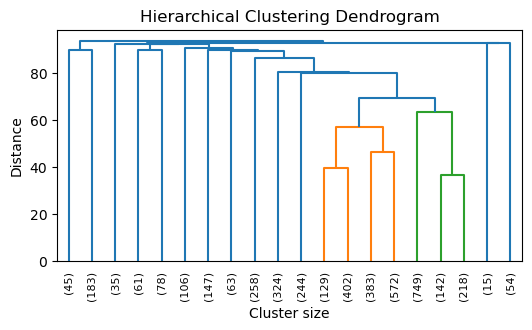

In [42]:
# Generating the linkage matrix
linkage_matrix_d = linkage(hierarchical_c_df.drop('hierarchical_labels', axis=1), method='ward', metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(6,3))
dendrogram(linkage_matrix_d, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


### Fuzzy C-Means

#### For Fuzzy C-means first install following
#### pip install -U scikit-fuzzy

In [43]:
# Assuming df_normalized is your normalized DataFrame and we are excluding any non-feature columns
X = scaled_df.drop(['kmeans_labels', 'hierarchical_labels'], axis=1, errors='ignore').values.T  # Transpose to match skfuzzy input

# Number of clusters and fuzziness parameter
num_clusters_fuz_para = 3
m_fuz_para = 2  # Common choice for fuzziness parameter

# Apply Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X, c=num_clusters_fuz_para, m=m_fuz_para, error=0.005, maxiter=1000, init=None)

# cntr: Cluster centers
# u: Final fuzzy partitioned matrix (membership grades)
# fpc: Fuzzy partition coefficient (performance indicator)
'''
- Determine Cluster Membership:The code uses np.argmax(u, axis=0) to determine the cluster membership of each data point based on the highest membership grade.
- Count Data Points per Cluster:It then counts the number of data points assigned to each cluster using np.unique() and np.bincount().
- Visualization:PCA is applied to reduce the dimensionality of the data to 2D for visualization purposes.A scatter plot is created where each data point is plotted in the reduced 2D space, with different colors representing different clusters.
- Labels and Legend:Labels are added to the plot to indicate the clusters.A legend is included to explain the colors used for each cluster.
Overall, this code should provide a visual representation of the Fuzzy C-Means clustering results, allowing you to observe the clusters in a 2D scatter plot. Adjustments can be made to the plot's appearance, such as colors, markers, and titles, based on your preferences and requirements.
'''

"\n- Determine Cluster Membership:The code uses np.argmax(u, axis=0) to determine the cluster membership of each data point based on the highest membership grade.\n- Count Data Points per Cluster:It then counts the number of data points assigned to each cluster using np.unique() and np.bincount().\n- Visualization:PCA is applied to reduce the dimensionality of the data to 2D for visualization purposes.A scatter plot is created where each data point is plotted in the reduced 2D space, with different colors representing different clusters.\n- Labels and Legend:Labels are added to the plot to indicate the clusters.A legend is included to explain the colors used for each cluster.\nOverall, this code should provide a visual representation of the Fuzzy C-Means clustering results, allowing you to observe the clusters in a 2D scatter plot. Adjustments can be made to the plot's appearance, such as colors, markers, and titles, based on your preferences and requirements.\n"

Cluster counts:
0     226
1    2223
2    1759
Name: count, dtype: int64


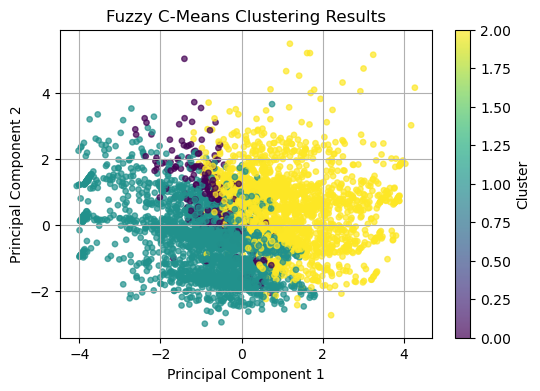

In [44]:
# Step 1: Determine cluster membership
# consider 'u' is the matrix of membership grades from Fuzzy C-Means
cluster_membership = np.argmax(u, axis=0) 

# Step 2: Counting Data Points per Cluster
unique, counts = np.unique(cluster_membership, return_counts=True)
cluster_counts_series = pd.Series(counts, index=unique, name='count')
print("Cluster counts:")
print(cluster_counts_series)

# Step 3: Visualization
# Using PCA for dimensionality reduction for visualization purposes
pca_f_c = PCA(n_components=2)
X_reduced = pca_f_c.fit_transform(scaled_df.drop(['kmeans_labels', 'hierarchical_labels'], axis=1, errors='ignore'))

# Calculate marker size based on cluster size
marker_size = 15

# Scatter plot of the first two principal components
plt.figure(figsize=(6, 4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_membership, cmap='viridis', s=marker_size, alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Fuzzy C-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


### Gaussian Mixture Model

Number of instances in each cluster:
0      59
1    2604
2    1545
Name: count, dtype: int64


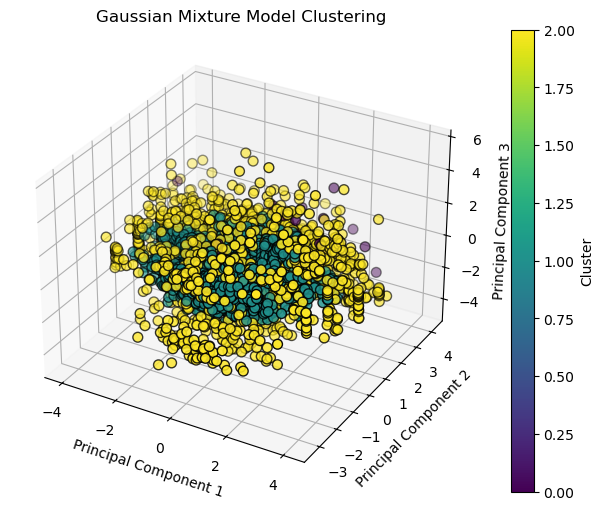

In [45]:
# Assuming scaled_df is your scaled dataset
scaled_df_gmm = scaled_df.drop('kmeans_labels', axis=1)

# Assuming n_components is the number of components for GMM
n_components_value = 3

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components_value, covariance_type="spherical",init_params='k-means++', random_state=42).fit(scaled_df_gmm)

# Fit GMM to your data
gmm.fit(scaled_df_gmm)

# Get cluster labels
cluster_labels = gmm.predict(scaled_df_gmm)

# Count the number of instances in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Display cluster counts with their corresponding labels
print("Number of instances in each cluster:")
print(cluster_counts)


# Perform PCA for visualization (assuming 3 components for 3D plot)
pca = PCA(n_components=3)
scaled_df_pca = pca.fit_transform(scaled_df_gmm)

# Plot the clusters in 3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(scaled_df_pca[:, 0], scaled_df_pca[:, 1], scaled_df_pca[:, 2], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Gaussian Mixture Model Clustering')

# Add color bar
plt.colorbar(scatter, ax=ax, label='Cluster')

# Show plot
plt.show()


### Evaluation of Different Model and their values for comparision

In [46]:
# Extracting cluster labels for silhouette score calculation
labels_kmeans = scaled_df['kmeans_labels'].values
labels_hierarchical = hierarchical_c_df['hierarchical_labels'].values
labels_fuzzy = np.argmax(u, axis=0)  # Assuming 'u' represents membership grades for Fuzzy C-Means
labels_gmm = gmm.predict(scaled_df_gmm)  # Assuming 'gmm' is your Gaussian Mixture Model

# Silhouette scores
silhouette_kmeans = silhouette_score(scaled_df.drop(['kmeans_labels', 'hierarchical_labels'], axis=1, errors='ignore'), labels_kmeans)
silhouette_hierarchical = silhouette_score(scaled_df.drop(['kmeans_labels', 'hierarchical_labels'], axis=1, errors='ignore'), labels_hierarchical)
silhouette_fuzzy = silhouette_score(scaled_df.drop(['kmeans_labels', 'hierarchical_labels'], axis=1, errors='ignore'), labels_fuzzy)
silhouette_gmm = silhouette_score(scaled_df_gmm, labels_gmm)

# Assuming df_normalized is your dataset and you have labels from k-Means, Hierarchical, and Fuzzy C-Means clustering
X = scaled_df.drop(['kmeans_labels', 'hierarchical_labels'], axis=1, errors='ignore')

# Davies-Bouldin Index
davies_bouldin_kmeans = davies_bouldin_score(X, labels_kmeans)
davies_bouldin_hierarchical = davies_bouldin_score(X, labels_hierarchical)
davies_bouldin_fuzzy = davies_bouldin_score(X, np.argmax(u, axis=0))
davies_bouldin_gmm = davies_bouldin_score(X, labels_gmm)

# Calinski-Harabasz Index
calinski_harabasz_kmeans = calinski_harabasz_score(X, labels_kmeans)
calinski_harabasz_hierarchical = calinski_harabasz_score(X, labels_hierarchical)
calinski_harabasz_fuzzy = calinski_harabasz_score(X, np.argmax(u, axis=0))
calinski_harabasz_gmm = calinski_harabasz_score(X,labels_gmm)


print('Evaluation cluster quality with diffrrent models and methods:')
print('\n')
print(f"Silhouette Score Comparison:")
print(f"For k-Means                 : {silhouette_kmeans:.3f}")
print(f"For Hierarchical Clustering : {silhouette_hierarchical:.3f}")
print(f"For Fuzzy C-Means           : {silhouette_fuzzy:.3f}")
print(f"For Gaussian Mixture Model  : {silhouette_gmm:.3f}")
print('\n')
print("\nDavies-Bouldin Index Comparison:")
print(f"For K-Means                 : {davies_bouldin_kmeans:.3f}")
print(f"For Hierarchical Clustering : {davies_bouldin_hierarchical:.3f}")
print(f"For Fuzzy C-Means           : {davies_bouldin_fuzzy:.3f}")
print(f"For Gaussian Mixture Model  : {davies_bouldin_gmm:.3f}")
print('\n')
print("Calinski-Harabasz Index Comparison:")
print(f"For K-Means                 : {calinski_harabasz_kmeans:.3f}")
print(f"For Hierarchical Clustering : {calinski_harabasz_hierarchical:.3f}")
print(f"For Fuzzy C-Means           : {calinski_harabasz_fuzzy:.3f}")
print(f"For Gaussian Mixture Model  : {calinski_harabasz_gmm:.3f}")


Evaluation cluster quality with diffrrent models and methods:


Silhouette Score Comparison:
For k-Means                 : 0.098
For Hierarchical Clustering : 0.306
For Fuzzy C-Means           : 0.086
For Gaussian Mixture Model  : 0.211



Davies-Bouldin Index Comparison:
For K-Means                 : 2.308
For Hierarchical Clustering : 1.656
For Fuzzy C-Means           : 3.935
For Gaussian Mixture Model  : 3.665


Calinski-Harabasz Index Comparison:
For K-Means                 : 275.483
For Hierarchical Clustering : 242.075
For Fuzzy C-Means           : 161.660
For Gaussian Mixture Model  : 184.262


## Diesease_test.csv test and generate predict Target from  best Train model

In [47]:
# Load Test dataset for check model 
patient_test_df = pd.read_csv("C:/Users/HP/Documents/CW2/disease_test.csv")
#submission_test_df = pd.read_csv("C:/Users/HP/Documents/CW2/disease_test.csv")
patient_test_df.head()

,id,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,...,enlargement,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect
0,PA6001,22,female,no,no,0.500,1.7,83.0,0.86,97.0,...,no,no,no,no,no,no,no,no,no,no
1,PA6002,42,male,no,no,0.060,2.0,79.0,0.81,98.0,...,no,no,no,no,no,no,no,no,no,no
2,PA6003,42,male,no,no,0.045,2.1,111.0,0.89,125.0,...,no,no,no,no,no,no,no,no,no,no
3,PA6004,42,female,no,no,1.900,2.0,114.0,1.33,86.0,...,no,no,no,no,no,no,no,no,no,no
4,PA6005,55,male,no,no,0.570,1.4,75.0,0.72,104.0,...,no,no,no,no,no,yes,no,no,no,no


In [48]:
# Drop id column for further anaysis
patient_test_df.drop('id',axis=1,inplace=True)
patient_test_df.head()

,age,gender,sick,pregnant,test_X1,test_X2,test_X3,test_X4,test_X5,test_X6,...,enlargement,tumor,disorder,medication_A,medication_B,mental_health,mood_stabiliser,surgery,treatment_type1,suspect
0,22,female,no,no,0.500,1.7,83.0,0.86,97.0,NaN,...,no,no,no,no,no,no,no,no,no,no
1,42,male,no,no,0.060,2.0,79.0,0.81,98.0,NaN,...,no,no,no,no,no,no,no,no,no,no
2,42,male,no,no,0.045,2.1,111.0,0.89,125.0,NaN,...,no,no,no,no,no,no,no,no,no,no
3,42,female,no,no,1.900,2.0,114.0,1.33,86.0,NaN,...,no,no,no,no,no,no,no,no,no,no
4,55,male,no,no,0.570,1.4,75.0,0.72,104.0,NaN,...,no,no,no,no,no,yes,no,no,no,no


In [49]:
# Seperate Numerical columns from Dataset for further anaysis 
test_numerical_columns = patient_test_df.select_dtypes(include=['int64','float64']).columns.tolist()
test_numerical_columns

['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'test_X6']

In [50]:
# Seperate Categorical columns from dataset for further anaysis
test_categorical_columns = patient_test_df.select_dtypes(include=['object']).columns.tolist()
test_categorical_columns

['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'disorder',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect']

In [51]:
# calculate percentage of missing values and suggest whose percentages > threshold vlaue

threshold = 60  # Set threshold here

test_missing_percentage = ((patient_test_df.isnull().sum() / len(patient_test_df)) * 100).sort_values(ascending=False)
test_columns_to_drop = test_missing_percentage[test_missing_percentage > threshold].index.tolist()

print("Columns with missing values > {}%:".format(threshold))
for column in test_columns_to_drop:
    print("{}: {:.2f}% missing values.".format(column, test_missing_percentage[column]))


Columns with missing values > 60%:
test_X6: 96.67% missing values.


In [52]:
# Drop coulmns whose missing percentages > threshold values.
patient_test_df.drop(columns=test_columns_to_drop, inplace=True)

In [53]:
# Verify columns after droping missing value columns based on threshold value percentages
patient_test_df.columns

Index(['age', 'gender', 'sick', 'pregnant', 'test_X1', 'test_X2', 'test_X3',
       'test_X4', 'test_X5', 'concern_type1', 'concern_type2', 'enlargement',
       'tumor', 'disorder', 'medication_A', 'medication_B', 'mental_health',
       'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect'],
      dtype='object')

In [54]:
# After Droping highest missing value column based on threshold value,handle remaining missing values.
test_updated_numerical_col = patient_test_df.select_dtypes(include=['int64','float64']).columns.tolist()
test_updated_numerical_col    


['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']

In [55]:
# For Numerical columns: Impute missing values with median
test_numeric_imputer = SimpleImputer(strategy="median")
patient_test_df[test_updated_numerical_col] = test_numeric_imputer.fit_transform(patient_test_df[test_updated_numerical_col])

# For Categorical column 'gender': Impute missing values with mode
test_categorical_imputer = SimpleImputer(strategy="most_frequent")
patient_test_df['gender'] = test_categorical_imputer.fit_transform(patient_test_df[['gender']]).ravel()

# Check if there are any remaining missing values
test_remaining_missing_values = patient_test_df.isnull().sum().sum()
if test_remaining_missing_values == 0:
    print("All missing values have been handled.")
else:
    print(f"There are still {test_remaining_missing_values} missing values after imputation.")


All missing values have been handled.


In [56]:
#find constant column if any in dataset
test_constant_columns = []
for col in patient_test_df.columns:
    if patient_test_df[col].nunique() == 1:
        test_constant_columns.append(col)

# Print constant columns
print("test Constant columns:", test_constant_columns)

test Constant columns: ['disorder']


In [57]:
# Drop Constant column from column list
patient_test_df.drop(columns=test_constant_columns, inplace=True)

In [58]:
# check remaining columns in dataframe after droping 'disorder' colum from dataset
patient_test_df.columns
patient_test_df.shape

(750, 20)

In [59]:
"""
# handle Duplicated Rows in dataset if any
test_duplicate_rows = patient_test_df[patient_test_df.duplicated()]
test_duplicate_rows
# Drop Duplicate values from dataset
patient_test_df.drop_duplicates(inplace=True)
patient_test_df.shape
"""

'\n# handle Duplicated Rows in dataset if any\ntest_duplicate_rows = patient_test_df[patient_test_df.duplicated()]\ntest_duplicate_rows\n# Drop Duplicate values from dataset\npatient_test_df.drop_duplicates(inplace=True)\npatient_test_df.shape\n'

In [60]:
# After handling Constant column, updated categorical col
test_update_categorical_col = patient_test_df.select_dtypes(include=['object']).columns.tolist()
test_update_categorical_col

['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect']

In [61]:
# Encoding on update_categorical_col for further analysis
patient_test_df_encoded = pd.get_dummies(patient_test_df, columns=test_update_categorical_col, drop_first=True)

In [62]:
# Check dataset after encoding 
patient_test_df_encoded = patient_test_df_encoded.astype(int)
patient_test_df_encoded.head()

,age,test_X1,test_X2,test_X3,test_X4,test_X5,gender_male,sick_yes,pregnant_yes,concern_type1_yes,concern_type2_yes,enlargement_yes,tumor_yes,medication_A_yes,medication_B_yes,mental_health_yes,mood_stabiliser_yes,surgery_yes,treatment_type1_yes,suspect_yes
0,22,0,1,83,0,97,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,42,0,2,79,0,98,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,42,0,2,111,0,125,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,42,1,2,114,1,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,55,0,1,75,0,104,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [63]:

# Predict target values for X_test using the best model
test_predicted_target = best_model.predict(patient_test_df_encoded)

# Decode the predicted target labels
test_predicted_target_original = le.inverse_transform(test_predicted_target)

# Create a DataFrame with the decoded predicted target values
test_predicted_df = pd.DataFrame(test_predicted_target_original, columns=['Target'])


In [64]:

# Save the DataFrame to a CSV file
test_predicted_df.to_csv('Predicted_Target_best_model.csv', index=False)